In [1]:
!pip install wandb

In [2]:
import wandb
wandb.init(project="Assignment-1_50", entity="swe-rana",name="assignment_1_sweeps")
#wandb.init(project="Assignment-1", entity="swe-rana")

wandb: Currently logged in as: swe-rana (use `wandb login --relogin` to force relogin)


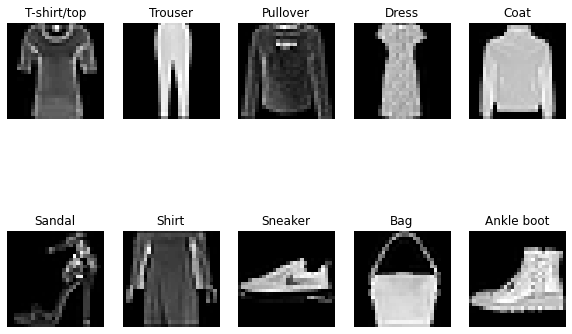

In [3]:
import wandb
wandb.init(project="Assignment-1", entity="swe-rana")

from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
label0=[]
label1=[]
label2=[]
label3=[]
label4=[]
label5=[]
label6=[]
label7=[]
label8=[]
label9=[]
for i in range(len(y_train)):
    if (y_train[i]==0):
        label0.append(i)
    if (y_train[i]==1):
        label1.append(i)
    if (y_train[i]==2):
        label2.append(i)
    if (y_train[i]==3):
        label3.append(i)
    if (y_train[i]==4):
        label4.append(i)
    if (y_train[i]==5):
        label5.append(i)
    if (y_train[i]==6):
        label6.append(i)
    if (y_train[i]==7):
        label7.append(i)
    if (y_train[i]==8):
        label8.append(i)
    if (y_train[i]==9):
        label9.append(i)
Class_names=(label0,label1,label2,label3,label4,label5,label6,label7,label8,label9)    
data = ("T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot")
rows=2
columns =5
fig = plt.figure(figsize=(10, 7))
for i,j in zip(range(1, columns*rows +1),range(0,10)):
        num = random.choice(Class_names[j])
        wandb.log({"images": [wandb.Image(X_train[num],caption=data[j])]})
        fig.add_subplot(rows, columns, i)
        plt.imshow(X_train[num],cmap ="gray")
        plt.axis('off')
        plt.title(data[j])
wandb.log({"image": plt})

In [4]:

from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


(t_train_x_orig,t_train_y),(test_x_orig,test_y)= fashion_mnist.load_data()

train_x_orig,x_val,train_y,y_val=train_test_split(t_train_x_orig,t_train_y,test_size=0.1,random_state = 43)

m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]
train_y = train_y.reshape(1, len(train_y))
test_y = test_y.reshape(1, len(test_y))
y_val = y_val.reshape(1, len(y_val))
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
x_val_flatten = x_val.reshape(x_val.shape[0],-1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
no_of_class=10

train_x = train_x_flatten/255
test_x = test_x_flatten/255
x_val = x_val_flatten/255
#layers_dims = [len(train_x),256,128,no_of_class]
onehot_encoded = list()

for i in range(train_y.shape[1]):
    c=train_y[:,i][0]
    letter = [0 for _ in range(no_of_class)]
    letter[c] = 1
    onehot_encoded.append(letter)

N=np.array(onehot_encoded)
Y=N.reshape(no_of_class,train_y.shape[1])
for i in range(0,train_y.shape[1]):
      Y[:,i] = N[i]

onehot_encoded_y_val = list()

for i in range(y_val.shape[1]):
    c=y_val[:,i][0]
    letter = [0 for _ in range(no_of_class)]
    letter[c] = 1
    onehot_encoded_y_val.append(letter)


M=np.array(onehot_encoded_y_val)
Y_val=M.reshape(no_of_class,y_val.shape[1])
for i in range(0,y_val.shape[1]):
      Y_val[:,i] = N[i]


#layers_dims = [len(train_x),256,128,no_of_class]


def initialize_parameters(layers_dims,initialization):    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)            # number of layers in the network

    for l in range(1, L):
        if initialization == 'Normal':
            parameters["W"+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 0.01
        elif initialization == 'Uniform':
            parameters["W"+str(l)] = np.random.rand(layers_dims[l], layers_dims[l-1]) * 0.01
        elif initialization == 'Xavier':
            parameters["W"+str(l)]= np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2/(layers_dims[l]+layers_dims[l-1]))
        parameters['b' + str(l)] =  np.zeros((layers_dims[l], 1))
    return parameters

def prev_updates(layers_dims):
        previous_updates = {}
        L = len(layers_dims)            # number of layers in the network
        for l in range(1, L):
            previous_updates["W"+str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
            previous_updates["b"+str(l)] = np.zeros((layers_dims[l], 1))
                    
        return previous_updates


def feed_forward(A, W, b):

    Z =np.dot(W, A) + b
    cache = (A, W, b)
    
    return Z, cache 





def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

def tanh(Z):
    A = np.tanh(Z)
    cache = Z
    return A,cache

def tanh_backward(dA,cache):
    Z=cache
    t = np.tanh(Z)
    dZ = 1 - (t**2)
    return dZ

def sigmoid_backward(dA, cache):
   
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    return dZ

def relu_backward(dA, cache):

    
    Z = cache
    dZ = np.array(dA, copy=True) 
    
    dZ[Z <= 0] = 0
     
    return dZ
    
def softmax(Z):
  cache = Z
  A = exp(Z)
  A = A / A.sum()
  return A,cache
 	
 	
 	
def activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache  = feed_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    if activation == "tanh":
        Z, linear_cache  = feed_forward(A_prev, W, b)
        A, activation_cache = tanh(Z)
    
    if activation == "relu":
        
        Z, linear_cache = feed_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    if activation == "softmax":
        
        Z, linear_cache = feed_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)

    cache = (linear_cache, activation_cache)

    return A, cache


def L_model_forward(X, parameters):
    
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    for l in range(1, L):
        A_prev = A 
        A, cache = activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation)
        caches.append(cache)
        
    AL, cache = activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation)
    caches.append(cache)
    AP=[]
    for i in range(AL.shape[1]):
         AA,cache = softmax(AL[:,i])
         AP.append(AA)         
    return AL, caches
             
#backpropagtion    
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1./m*np.dot(dZ, A_prev.T)
    db = 1./m*np.sum(dZ, axis = 1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    return dA_prev, dW, db

    
    
def activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    if activation == "tanh":
        dZ = tanh_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

        
    if activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    
    return dA_prev, dW, db    

def L_model_backward(Y,AL, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = activation_backward(dAL, current_cache, activation)
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = activation_backward(grads["dA" + str(l + 2)],  current_cache, "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads
def update_parameters(parameters, grads, learning_rate,lamda):
    
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)] 
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters
    
#stochastic gradient    


def stochastic_gradient(X, Y, layers_dims, learning_rate,num_epochs,lamda,initialisation,loss):
          z_acc = []
          val_acc = []
          Train_loss = []
          Val_loss = []
          parameters = initialize_parameters(layers_dims,initialisation)
          print("in stochastic")
          for j in range(0,num_epochs):
            for i in range(0,iterations_bat):
                start = i*batch_size
                end = start+batch_size
                AL, caches = L_model_forward(X[:,start:end], parameters)
                grads = L_model_backward(Y[:,start:end],AL, caches)
                parameters = update_parameters(parameters, grads, learning_rate,lamda)
            z_pred_1, caches = L_model_forward(train_x, parameters)
            z_pred = np.argmax(z_pred_1,axis = 0)
            zyy = train_y.flatten()
            z_acc.append(accuracy_score(zyy,z_pred))
            #print("Train accuracy",z_acc) 
            val_pred, caches = L_model_forward(x_val, parameters)
            val_prediction = np.argmax(val_pred,axis = 0)
            val_y_flat = y_val.flatten()
            val_acc.append(accuracy_score(val_y_flat,val_prediction))

            if loss =="cross_entropy" :
                Train_loss.append(cross_entropy_loss(train_x,Y,parameters))
                Val_loss.append(cross_entropy_loss(x_val,Y_val,parameters))
            elif loss =="MSE" :
                 Train_loss.append(MSE(train_x,Y,parameters))
                 Val_loss.append(cross_entropy_loss(x_val,Y_val,parameters))
          return parameters,z_acc,val_acc,Train_loss,Val_loss
#momentum gradient descent optimizer
def momentum(X,Y,layers_dims,learning_rate,beta,num_epochs,initialisation,loss):
    z_acc = []
    val_acc = []
    
    Train_loss = []
    Val_loss = []
    parameters = initialize_parameters(layers_dims,initialisation)
    previous_updates =prev_updates(layers_dims)
    L = len(parameters) // 2 # number of layers in the neural network
    for j in range(0,num_epochs):
        for i in range(0,iterations_bat):
            start = i*batch_size
            end = start+batch_size
            AL, caches = L_model_forward(X[:,start:end], parameters)
            grads = L_model_backward(Y[:,start:end],AL, caches)
                                   
            for l in range(1, L + 1):
                previous_updates["W"+str(l)] = (beta*previous_updates["W"+str(l)]) + ((1-beta)*grads["dW" + str(l)])
                parameters["W" + str(l)] = parameters["W" + str(l)] - (learning_rate*previous_updates["W"+str(l)])
                
                previous_updates["b"+str(l)] = (beta*previous_updates["b"+str(l)]) + ((1-beta)*grads["db" + str(l)])
                parameters["b" + str(l)] = parameters["b" + str(l)] - (learning_rate*previous_updates["b"+str(l)])
            
          
        z_pred_1, caches = L_model_forward(train_x, parameters)
        z_pred = np.argmax(z_pred_1,axis = 0)
        zyy = train_y.flatten()
        z_acc.append(accuracy_score(zyy,z_pred))
        #print("Train accuracy",z_acc) 
        val_pred, caches = L_model_forward(x_val, parameters)
        val_prediction = np.argmax(val_pred,axis = 0)
        val_y_flat = y_val.flatten()
        val_acc.append(accuracy_score(val_y_flat,val_prediction))
        #print("validation accuracy",val_acc) 
        if loss =="cross_entropy" :
            Train_loss.append(cross_entropy_loss(train_x,Y,parameters))
            Val_loss.append(cross_entropy_loss(x_val,Y_val,parameters))
        elif loss =="MSE" :
             Train_loss.append(MSE(train_x,Y,parameters))
             Val_loss.append(cross_entropy_loss(x_val,Y_val,parameters))

    return parameters, previous_updates,z_acc,val_acc,Train_loss,Val_loss
# rmsprop optimizer
def rmsprop(X,Y,layers_dims,learning_rate,beta,num_epochs,initialisation,loss):
    z_acc = []
    val_acc = []
    Train_loss = []
    Val_loss = []
    
    parameters = initialize_parameters(layers_dims,initialisation)
    previous_updates =prev_updates(layers_dims)
    for j in range(0,num_epochs):
        for i in range(0,iterations_bat):
           
           start = i*batch_size
           end = start+batch_size
           AL, caches = L_model_forward(X[:,start:end], parameters)

           grads = L_model_backward(Y[:,start:end],AL, caches)

           delta = 1e-6 
            
           L = len(parameters) // 2 
        
           for l in range(1, L + 1):
                vdw = beta*previous_updates["W" + str(l)] + (1-beta)*np.multiply(grads["dW" + str(l)],grads["dW" + str(l)])
                vdb = beta*previous_updates["b" + str(l)] + (1-beta)*np.multiply(grads["db" + str(l)],grads["db" + str(l)])
        
                parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)] / (np.sqrt(vdw)+delta)
                parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)] / (np.sqrt(vdb)+delta)
        
                previous_updates["W" + str(l)] = vdw
                previous_updates["b" + str(l)] = vdb
           
        z_pred_1, caches = L_model_forward(train_x, parameters)
        z_pred = np.argmax(z_pred_1,axis = 0)
        zyy = train_y.flatten()
        z_acc.append(accuracy_score(zyy,z_pred))
        #print("Train accuracy",z_acc) 
        val_pred, caches = L_model_forward(x_val, parameters)
        val_prediction = np.argmax(val_pred,axis = 0)
        val_y_flat = y_val.flatten()
        val_acc.append(accuracy_score(val_y_flat,val_prediction))
        #print("validation accuracy",val_acc) 
        if loss =="cross_entropy" :
            Train_loss.append(cross_entropy_loss(train_x,Y,parameters))
            Val_loss.append(cross_entropy_loss(x_val,Y_val,parameters))
        elif loss =="MSE" :
             Train_loss.append(MSE(train_x,Y,parameters))
             Val_loss.append(cross_entropy_loss(x_val,Y_val,parameters))        

    return parameters, previous_updates,z_acc,val_acc,Train_loss,Val_loss

def adam(X,Y,layers_dims,v,m,t,learning_rate,beta,num_epochs,initialisation,loss):
    z_acc = []
    val_acc = []
    Train_loss = []
    Val_loss = []

    parameters = initialize_parameters(layers_dims,initialisation)
    for j in range(0,num_epochs):
            for i in range(0,iterations_bat):
                start = i*batch_size
                end = start+batch_size
                AL, caches = L_model_forward(X[:,start:end], parameters)
                grads = L_model_backward(Y[:,start:end],AL, caches)
                
                L = len(parameters) // 2 # number of layers in the neural network
                beta1 = 0.9
                beta2 = 0.999
                epsilon = 1e-8
            
                for l in range(1, L+1):
                    mdw = beta1*m["W"+str(l)] + (1-beta1)*grads["dW"+str(l)]
                    vdw = beta2*v["W"+str(l)] + (1-beta2)*np.square(grads["dW"+str(l)])
                    mw_hat = mdw/(1.0 - beta1**t)
                    vw_hat = vdw/(1.0 - beta2**t)
            
                    parameters["W"+str(l)] = parameters["W"+str(l)] - (learning_rate * mw_hat)/np.sqrt(vw_hat + epsilon)
            
                    mdb = beta1*m["b"+str(l)] + (1-beta1)*grads["db"+str(l)]
                    vdb = beta2*v["b"+str(l)] + (1-beta2)*np.square(grads["db"+str(l)])
                    mb_hat = mdb/(1.0 - beta1**t)
                    vb_hat = vdb/(1.0 - beta2**t)
            
                    parameters["b"+str(l)] = parameters["b"+str(l)] - (learning_rate * mb_hat)/np.sqrt(vb_hat + epsilon)
            
                    v["dW"+str(l)] = vdw
                    m["dW"+str(l)] = mdw
                    v["db"+str(l)] = vdb
                    m["db"+str(l)] = mdb
            
                t = t + 1 # timestep   
            
            z_pred_1, caches = L_model_forward(train_x, parameters)
            z_pred = np.argmax(z_pred_1,axis = 0)
            zyy = train_y.flatten()
            z_acc.append(accuracy_score(zyy,z_pred))
            #print("Train accuracy",z_acc) 
            val_pred, caches = L_model_forward(x_val, parameters)
            val_prediction = np.argmax(val_pred,axis = 0)
            val_y_flat = y_val.flatten()
            val_acc.append(accuracy_score(val_y_flat,val_prediction))
            #print("validation accuracy",val_acc) 

            if loss =="cross_entropy" :
                Train_loss.append(cross_entropy_loss(train_x,Y,parameters))
                Val_loss.append(cross_entropy_loss(x_val,Y_val,parameters))
            elif loss =="MSE" :
                 Train_loss.append(MSE(train_x,Y,parameters))
                 Val_loss.append(cross_entropy_loss(x_val,Y_val,parameters))

    return parameters,v,m,t,z_acc,val_acc,Train_loss,Val_loss

def Nadam(X,Y,layers_dims,m,v,t,learning_rate,beta,num_epochs,initialisation,loss):
    
    z_acc = []
    val_acc = []
    Train_loss = []
    Val_loss = []


    parameters = initialize_parameters(layers_dims,initialisation)
    previous_updates = v
    L = len(parameters )//2
    for j in range(0,num_epochs):
        for l in range(1, L+1):
            parameters ["W"+str(l)] = parameters ["W"+str(l)] - beta*previous_updates["W"+str(l)]
            parameters ["b"+str(l)] = parameters ["b"+str(l)] - beta*previous_updates["b"+str(l)]
        for i in range(0,iterations_bat):
            start = i*batch_size
            end = start+batch_size
            AL, caches = L_model_forward(X[:,start:end], parameters)
            grads = L_model_backward( Y[:,start:end],AL,caches)
            
            L = len(parameters) // 2 # number of layers in the neural network
            beta1 = 0.9
            beta2 = 0.999
            epsilon = 1e-8
        
            for l in range(1, L+1):
                mdw = beta1*m["W"+str(l)] + (1-beta1)*grads["dW"+str(l)]
                vdw = beta2*v["W"+str(l)] + (1-beta2)*np.square(grads["dW"+str(l)])
                mw_hat = mdw/(1.0 - beta1**t)
                vw_hat = vdw/(1.0 - beta2**t)
        
                parameters["W"+str(l)] = parameters["W"+str(l)] - (learning_rate * mw_hat)/np.sqrt(vw_hat + epsilon)
        
                mdb = beta1*m["b"+str(l)] + (1-beta1)*grads["db"+str(l)]
                vdb = beta2*v["b"+str(l)] + (1-beta2)*np.square(grads["db"+str(l)])
                mb_hat = mdb/(1.0 - beta1**t)
                vb_hat = vdb/(1.0 - beta2**t)
        
                parameters["b"+str(l)] = parameters["b"+str(l)] - (learning_rate * mb_hat)/np.sqrt(vb_hat + epsilon)
        
                v["dW"+str(l)] = vdw
                m["dW"+str(l)] = mdw
                v["db"+str(l)] = vdb
                m["db"+str(l)] = mdb
        
            t = t + 1 # timestep            

        z_pred_1, caches = L_model_forward(train_x, parameters)
        z_pred = np.argmax(z_pred_1,axis = 0)
        zyy = train_y.flatten()
        z_acc.append(accuracy_score(zyy,z_pred))
        #print("Train accuracy",z_acc) 
        val_pred, caches = L_model_forward(x_val, parameters)
        val_prediction = np.argmax(val_pred,axis = 0)
        val_y_flat = y_val.flatten()
        val_acc.append(accuracy_score(val_y_flat,val_prediction))
        #print("validation accuracy",val_acc) 
        if loss =="cross_entropy" :
            Train_loss.append(cross_entropy_loss(train_x,Y,parameters))
            Val_loss.append(cross_entropy_loss(x_val,Y_val,parameters))
        elif loss =="MSE" :
             Train_loss.append(MSE(train_x,Y,parameters))
             Val_loss.append(cross_entropy_loss(x_val,Y_val,parameters))

    return parameters,z_acc,val_acc,Train_loss,Val_loss

def nesterov(X,Y,learning_rate,beta,previous_updates,num_epochs,initialisation,loss):
    z_acc = []
    val_acc = []        
    Train_loss = []
    Val_loss = []

    parameters=initialize_parameters(layers_dims,initialisation)
    L = len(parameters)//2
    for j in range(0,num_epochs):
        for l in range(1, L+1):
            parameters["W"+str(l)] = parameters["W"+str(l)] - beta*previous_updates["W"+str(l)]
            parameters["b"+str(l)] = parameters["b"+str(l)] - beta*previous_updates["b"+str(l)]
        for i in range(0,iterations_bat):
            start = i*batch_size
            end = start+batch_size    
            AL, caches = L_model_forward(X[:,start:end], parameters)
            grads = L_model_backward( Y[:,start:end],AL,caches)
            
            L = len(parameters) // 2 # number of layers in the neural network
           
            for l in range(1, L + 1):
                previous_updates["W"+str(l)] = beta*previous_updates["W"+str(l)] + (1-beta)*grads["dW" + str(l)]
                parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*previous_updates["W"+str(l)]
                
                previous_updates["b"+str(l)] = beta*previous_updates["b"+str(l)] + (1-beta)*grads["db" + str(l)]
                parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*previous_updates["b"+str(l)]
             
        z_pred_1, caches = L_model_forward(train_x, parameters)
        z_pred = np.argmax(z_pred_1,axis = 0)
        zyy = train_y.flatten()
        z_acc.append(accuracy_score(zyy,z_pred))
        #print("Train accuracy",z_acc) 
        val_pred, caches = L_model_forward(x_val, parameters)
        val_prediction = np.argmax(val_pred,axis = 0)
        val_y_flat = y_val.flatten()
        val_acc.append(accuracy_score(val_y_flat,val_prediction))
        #print("validation accuracy",val_acc) 
        
        if loss =="cross_entropy" :
            Train_loss.append(cross_entropy_loss(train_x,Y,parameters))
            Val_loss.append(cross_entropy_loss(x_val,Y_val,parameters))
        elif loss =="MSE" :
             Train_loss.append(MSE(train_x,Y,parameters))
             Val_loss.append(cross_entropy_loss(x_val,Y_val,parameters))        

    return parameters,z_acc,val_acc,Train_loss,Val_loss            


def MSE(X,Y,parameters):
    AL, caches = L_model_forward(X, parameters)
    sm=[]
    for i in range(AL.shape[1]):
        n=AL[:,i]
        u,_=softmax(n)
        sm.append(u)
    p=np.array(sm) 
    v=p.T
    Loss = (1/2) * np.sum((Y-v)**2)/train_x.shape[1]
    return Loss


def cross_entropy_loss(X,Y,parameters):
    AL, caches = L_model_forward(X, parameters)
    sm=[]
    for i in range(AL.shape[1]):
        n=AL[:,i]
        u,_=softmax(n)
        sm.append(u)
    p=np.array(sm) 
    v=p.T
    val=-np.sum(Y*(np.log(v)))
    val=val/train_x.shape[1]    
    return val
    
global batch_size
global iterations_bat
global activation
global layers_dims
    

In [5]:
def train_network(learning_rate,num_epochs,optimizer,loss,init_param,hid_layer_sizes,bat_size,activate_func):
    t = 1
    beta = 0.9
    lamda = 0.0005
    hid_layer_sizes
    no_of_class = [len(np.unique(train_y))]
    global layers_dims
    layers_dims = [len(train_x)] + hid_layer_sizes +no_of_class
    global activation
    global batch_size
    global iterations_bat
    activation = activate_func
    batch_size = bat_size
    iterations_bat = int(train_x.shape[1]/batch_size) 

    print(layers_dims)
#    loss = "cross_entropy"
    initialisation = init_param #"Xavier"
    gd_optimizer = optimizer
    previous_updates = prev_updates(layers_dims)
    if(gd_optimizer == "stochastic_gradient"):
        parameters,z_acc,val_acc,Train_loss,Val_loss =stochastic_gradient(train_x, Y, layers_dims, learning_rate,num_epochs,lamda,initialisation,loss)

    if(gd_optimizer == "momentum"):
        parameters,previous_updates,z_acc,val_acc,Train_loss,Val_loss=momentum(train_x,Y,layers_dims,learning_rate,beta,num_epochs,initialisation,loss)

    if(gd_optimizer == "rmsprop"):
        parameters, previous_updates,z_acc,val_acc,Train_loss,Val_loss=rmsprop(train_x,Y,layers_dims,learning_rate,beta,num_epochs,initialisation,loss)

    if(gd_optimizer == "Adam"):
        parameters,v,m,t,z_acc,val_acc,Train_loss,Val_loss=adam(train_x,Y,layers_dims,previous_updates,previous_updates,t,learning_rate,beta,num_epochs,initialisation,loss)

    if(gd_optimizer == "Nadam"): 
        parameters,z_acc,val_acc,Train_loss,Val_loss=Nadam(train_x,Y,layers_dims,previous_updates,previous_updates,t,learning_rate,beta,num_epochs,initialisation,loss)

    if(gd_optimizer == "nesterov"):
        parameters,z_acc,val_acc,Train_loss,Val_loss=nesterov(train_x,Y,learning_rate,beta,previous_updates,num_epochs,initialisation,loss)

    train_accuracy = [element * 100 for element in z_acc]
    val_accuracy = [element * 100 for element in val_acc]
    # wandb.log({'train_loss':Train_loss})         
    # wandb.log({'train_accuracy':train_accuracy})
    # wandb.log({'val_accuracy':val_accuracy})
    # wandb.log({'val_loss':Val_loss})
    # wandb.log({'num_epochs':num_epochs})
    #for zi in range(len(train_accuracy)):
    #    print(zi)
    #    wandb.log({"train_acc": train_accuracy, "validation_accuracy": val_accuracy, "train_loss": Train_loss, "validation cost": Val_loss, 'epoch': zi+1})

    print("val accuracy", val_accuracy)
    print("train accuracy", train_accuracy)
    return val_accuracy,train_accuracy,Train_loss,Val_loss        

#train_netwrok(0.001,5,"Adam","cross-entropy","Xavier",[256,128],100,"sigmoid")



In [6]:
sweep_config = {
    'method': 'random',
    'metric': {
      'name': 'val_accuracy',
      'goal': 'maximize' 
    },
    'parameters': {
        'learning_rate': {
            'values': [0.01,0.001]
        },
        'num_epochs': {
            'values': [10,15,20]
        },
        'optimizer': {
            'values': ['Adam','Nadam','momentum','stochastic_gradient','rmsprop','nesterov']
        },
        'loss': {
            'values': ['cross_entropy','MSE']
        },
        'init_param': {
            'values': ['Xavier']
        },
        'hid_layer_sizes': {
            'values': [[256,128], [256,128,64],[256,128,64,32]]
        }, 
        'bat_size': {
            'values': [16,32,48]
        }, 
        'activate_func': {
            'values': ['sigmoid','relu','tanh']
        }, 
    }
}

In [7]:
#sweep_id = wandb.sweep(sweep_config, project="Assignment-1", entity="swe-rana")

In [8]:
def train():
    config_defaults = {
        'learning_rate': 0.01,
        'num_epochs': 5,
        'optimizer': 'Adam',
        'loss': 'cross_entropy',
        'init_param': 'Xavier',
        'hid_layer_sizes' : [256,128],
        'bat_size':48,
        'activate_func': 'sigmoid'
    }

    wandb.init(config=config_defaults)
    config = wandb.config
    learning_rate = config.learning_rate
    num_epochs = config.num_epochs
    optimizer = config.optimizer
    loss = config.loss
    init_param = config.init_param
    hid_layer_sizes = config.hid_layer_sizes
    bat_size = config.bat_size
    activate_func = config.activate_func
    run_name = "hl_{}_bs_{}_ac_{}_initparam_{}_op_{}_ep_{}_lr_{}".format(hid_layer_sizes,bat_size, activate_func, init_param, optimizer,num_epochs,learning_rate)

    val_accuracy,train_accuracy,Train_loss,Val_loss=train_network(learning_rate,num_epochs,optimizer,loss,init_param,hid_layer_sizes,bat_size,activate_func)
    for zi in range(len(train_accuracy)):
        print(zi)
        wandb.log({'train_loss':Train_loss[zi]})         
        wandb.log({'train_accuracy':train_accuracy[zi]})
        wandb.log({'val_accuracy':val_accuracy[zi]})
        wandb.log({'val_loss':Val_loss[zi]})
        wandb.log({'num_epochs':zi+1})
        #wandb.log({"train_acc": train_accuracy, "validation_accuracy": val_accuracy, "train_loss": Train_loss, "validation cost": Val_loss, 'epoch': zi+1})

    wandb.run.name = run_name
    wandb.run.save()
    wandb.run.finish()


In [ ]:
import warnings
sweep_id = wandb.sweep(sweep_config, project="Assignment-1_50", entity="swe-rana")
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
wandb.agent(sweep_id, train, count=100)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: 0bl2z8gg
Sweep URL: https://wandb.ai/swe-rana/Assignment-1_50/sweeps/0bl2z8gg


wandb: Agent Starting Run: oq07thr8 with config:
wandb: 	activate_func: relu
wandb: 	bat_size: 32
wandb: 	hid_layer_sizes: [256, 128]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.01
wandb: 	loss: MSE
wandb: 	num_epochs: 20
wandb: 	optimizer: rmsprop


[784, 256, 128, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:352: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:353: RuntimeWarning: invalid value encountered in true_divide
wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


val accuracy [10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334]
train accuracy [9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


num_epochs,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,
val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,
num_epochs,20
train_accuracy,9.97963
train_loss,nan
val_accuracy,10.18333
val_loss,nan


wandb: Agent Starting Run: m2aiatu0 with config:
wandb: 	activate_func: sigmoid
wandb: 	bat_size: 16
wandb: 	hid_layer_sizes: [256, 128, 64, 32]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 15
wandb: 	optimizer: momentum


[784, 256, 128, 64, 32, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/pyth

val accuracy [9.633333333333335, 9.633333333333335, 9.633333333333335, 18.866666666666667, 18.5, 19.766666666666666, 19.05, 18.75, 18.383333333333333, 14.666666666666666, 19.28333333333333, 19.233333333333334, 19.183333333333334, 18.76666666666667, 18.333333333333332]
train accuracy [10.040740740740741, 10.040740740740741, 10.040740740740741, 18.957407407407405, 18.188888888888886, 19.205555555555556, 19.746296296296293, 19.466666666666665, 19.194444444444443, 15.768518518518517, 20.04259259259259, 19.98148148148148, 19.807407407407407, 19.28148148148148, 18.946296296296296]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


num_epochs,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,▁▁▁▇▇▇██▇▅███▇▇
train_loss,██▇▅▂▃▂▃▄▁▁▁▁▂▂
val_accuracy,▁▁▁▇▇██▇▇▄███▇▇
val_loss,▂▂▂▁▃▃▅▆▅██▇▆▆▆
num_epochs,15
train_accuracy,18.9463
train_loss,2.29557
val_accuracy,18.33333
val_loss,0.25372


wandb: Agent Starting Run: 2x9l52ek with config:
wandb: 	activate_func: relu
wandb: 	bat_size: 32
wandb: 	hid_layer_sizes: [256, 128, 64]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 15
wandb: 	optimizer: Adam


[784, 256, 128, 64, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launc

val accuracy [10.483333333333334, 10.483333333333334, 10.483333333333334, 10.483333333333334, 10.483333333333334, 10.483333333333334, 10.483333333333334, 10.483333333333334, 10.483333333333334, 10.483333333333334, 10.483333333333334, 10.483333333333334, 10.483333333333334, 10.483333333333334, 10.483333333333334]
train accuracy [9.946296296296296, 9.946296296296296, 9.946296296296296, 9.946296296296296, 9.946296296296296, 9.946296296296296, 9.946296296296296, 9.946296296296296, 9.946296296296296, 9.946296296296296, 9.946296296296296, 9.946296296296296, 9.946296296296296, 9.946296296296296, 9.946296296296296]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


num_epochs,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,
val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,
num_epochs,15
train_accuracy,9.9463
train_loss,nan
val_accuracy,10.48333
val_loss,nan


wandb: Agent Starting Run: gq8y4bew with config:
wandb: 	activate_func: relu
wandb: 	bat_size: 32
wandb: 	hid_layer_sizes: [256, 128, 64]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 20
wandb: 	optimizer: stochastic_gradient


[784, 256, 128, 64, 10]
in stochastic


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:575: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:575: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_la

val accuracy [9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001]
train accuracy [10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


num_epochs,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,
val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,
num_epochs,20
train_accuracy,10.03333
train_loss,nan
val_accuracy,9.7
val_loss,nan


wandb: Agent Starting Run: ff00z6ik with config:
wandb: 	activate_func: sigmoid
wandb: 	bat_size: 16
wandb: 	hid_layer_sizes: [256, 128, 64, 32]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 15
wandb: 	optimizer: Nadam


[784, 256, 128, 64, 32, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:125: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:125: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:125: RuntimeWarning: invalid value encountered in multiply


val accuracy [16.650000000000002, 9.366666666666665, 9.950000000000001, 10.583333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334]
train accuracy [17.242592592592594, 10.0, 10.005555555555555, 9.935185185185185, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


num_epochs,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,▁█
val_accuracy,█▁▂▂▂▂▂▂▂▂▂▂▂▂▂
val_loss,█▁
num_epochs,15
train_accuracy,9.97963
train_loss,nan
val_accuracy,10.18333
val_loss,nan


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: bq55t6or with config:
wandb: 	activate_func: relu
wandb: 	bat_size: 16
wandb: 	hid_layer_sizes: [256, 128, 64]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.01
wandb: 	loss: MSE
wandb: 	num_epochs: 10
wandb: 	optimizer: nesterov


[784, 256, 128, 64, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launc

val accuracy [9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75]
train accuracy [10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777]
0
1
2
3
4
5
6
7
8
9


num_epochs,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,
num_epochs,10
train_accuracy,10.02778
train_loss,nan
val_accuracy,9.75
val_loss,nan


wandb: Agent Starting Run: eh8wdzyf with config:
wandb: 	activate_func: tanh
wandb: 	bat_size: 16
wandb: 	hid_layer_sizes: [256, 128]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 15
wandb: 	optimizer: nesterov


[784, 256, 128, 10]
val accuracy [15.25, 14.066666666666666, 13.600000000000001, 13.25, 12.966666666666669, 12.7, 12.45, 12.25, 12.116666666666667, 11.95, 11.733333333333333, 11.700000000000001, 11.533333333333333, 11.466666666666667, 11.333333333333332]
train accuracy [14.99074074074074, 14.314814814814813, 13.662962962962963, 13.153703703703703, 12.785185185185185, 12.47037037037037, 12.238888888888889, 12.003703703703703, 11.831481481481482, 11.698148148148148, 11.581481481481482, 11.488888888888889, 11.357407407407408, 11.25, 11.127777777777778]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


num_epochs,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,█▇▆▅▄▃▃▃▂▂▂▂▁▁▁
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,█▆▅▄▄▃▃▃▂▂▂▂▁▁▁
val_loss,█▁█████████████
num_epochs,15
train_accuracy,11.12778
train_loss,2.30348
val_accuracy,11.33333
val_loss,0.25367


wandb: Agent Starting Run: msbgan5n with config:
wandb: 	activate_func: sigmoid
wandb: 	bat_size: 48
wandb: 	hid_layer_sizes: [256, 128, 64, 32]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss: MSE
wandb: 	num_epochs: 20
wandb: 	optimizer: momentum


[784, 256, 128, 64, 32, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/pyth

val accuracy [9.533333333333333, 9.533333333333333, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335]
train accuracy [10.051851851851852, 10.051851851851852, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


num_epochs,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,██▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▂▂▂▂▂▂▁▄▆▆▇▇▇▆▆▆▆▆▆
val_accuracy,▁▁██████████████████
val_loss,▁▂▄▄▅▅▄▄█▇▇██▇▇▇▇▇▇▇
num_epochs,20
train_accuracy,10.04074
train_loss,0.45016
val_accuracy,9.63333
val_loss,0.25367


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8rxh6k1s with config:
wandb: 	activate_func: tanh
wandb: 	bat_size: 32
wandb: 	hid_layer_sizes: [256, 128]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.01
wandb: 	loss: MSE
wandb: 	num_epochs: 20
wandb: 	optimizer: Nadam


[784, 256, 128, 10]
val accuracy [12.083333333333334, 12.966666666666669, 13.683333333333334, 14.2, 14.483333333333334, 14.683333333333334, 14.85, 14.966666666666667, 15.016666666666667, 15.1, 15.15, 15.116666666666667, 15.133333333333333, 15.15, 15.15, 15.216666666666667, 15.283333333333331, 15.233333333333333, 15.216666666666667, 15.216666666666667]
train accuracy [11.868518518518519, 12.90925925925926, 13.50925925925926, 13.783333333333333, 13.988888888888889, 14.148148148148149, 14.279629629629632, 14.33148148148148, 14.355555555555554, 14.414814814814815, 14.446296296296296, 14.462962962962964, 14.45925925925926, 14.485185185185184, 14.474074074074075, 14.457407407407407, 14.45, 14.446296296296296, 14.451851851851853, 14.44074074074074]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


num_epochs,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,▁▄▅▆▇▇▇█████████████
train_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▅▆▆▇▇▇▇███████████
val_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
num_epochs,20
train_accuracy,14.44074
train_loss,0.45016
val_accuracy,15.21667
val_loss,0.25367


wandb: Agent Starting Run: 9qz6semc with config:
wandb: 	activate_func: sigmoid
wandb: 	bat_size: 16
wandb: 	hid_layer_sizes: [256, 128]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 10
wandb: 	optimizer: Adam


[784, 256, 128, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/pyth

val accuracy [53.016666666666666, 50.78333333333334, 59.166666666666664, 58.25, 52.63333333333333, 36.916666666666664, 45.86666666666667, 50.78333333333334, 55.45, 57.91666666666667]
train accuracy [52.83888888888889, 50.93703703703704, 58.81666666666666, 58.39259259259259, 53.029629629629625, 37.379629629629626, 46.266666666666666, 50.23888888888889, 55.833333333333336, 57.672222222222224]
0
1
2
3
4
5
6
7
8
9


num_epochs,▁▂▃▃▄▅▆▆▇█
train_accuracy,▆▅██▆▁▄▅▇█
train_loss,█▇▄▄▇▇▄▄▂▁
val_accuracy,▆▅██▆▁▄▅▇█
val_loss,▁▄▅▄▃▅▆▇▇█
num_epochs,10
train_accuracy,57.67222
train_loss,2.23695
val_accuracy,57.91667
val_loss,0.25409


wandb: Agent Starting Run: 50qkq5lp with config:
wandb: 	activate_func: relu
wandb: 	bat_size: 32
wandb: 	hid_layer_sizes: [256, 128, 64]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 15
wandb: 	optimizer: rmsprop


[784, 256, 128, 64, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:352: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:353: RuntimeWarning: invalid value encountered in true_divide


val accuracy [10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334]
train accuracy [9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


num_epochs,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,
val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,
num_epochs,15
train_accuracy,9.97963
train_loss,nan
val_accuracy,10.18333
val_loss,nan


wandb: Agent Starting Run: ckz2nsyp with config:
wandb: 	activate_func: sigmoid
wandb: 	bat_size: 48
wandb: 	hid_layer_sizes: [256, 128]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.01
wandb: 	loss: MSE
wandb: 	num_epochs: 15
wandb: 	optimizer: rmsprop


[784, 256, 128, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


val accuracy [10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334]
train accuracy [9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


num_epochs,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,
val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,
num_epochs,15
train_accuracy,9.97963
train_loss,nan
val_accuracy,10.18333
val_loss,nan


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: w54xonom with config:
wandb: 	activate_func: tanh
wandb: 	bat_size: 16
wandb: 	hid_layer_sizes: [256, 128]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss: MSE
wandb: 	num_epochs: 10
wandb: 	optimizer: nesterov


[784, 256, 128, 10]
val accuracy [15.25, 14.066666666666666, 13.600000000000001, 13.25, 12.966666666666669, 12.7, 12.45, 12.25, 12.116666666666667, 11.95]
train accuracy [14.99074074074074, 14.314814814814813, 13.662962962962963, 13.153703703703703, 12.785185185185185, 12.47037037037037, 12.238888888888889, 12.003703703703703, 11.831481481481482, 11.698148148148148]
0
1
2
3
4
5
6
7
8
9


num_epochs,▁▂▃▃▄▅▆▆▇█
train_accuracy,█▇▅▄▃▃▂▂▁▁
train_loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,█▅▅▄▃▃▂▂▁▁
val_loss,█▁████████
num_epochs,10
train_accuracy,11.69815
train_loss,0.45016
val_accuracy,11.95
val_loss,0.25367


wandb: Agent Starting Run: c6s29bxk with config:
wandb: 	activate_func: sigmoid
wandb: 	bat_size: 48
wandb: 	hid_layer_sizes: [256, 128, 64, 32]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss: MSE
wandb: 	num_epochs: 15
wandb: 	optimizer: rmsprop


[784, 256, 128, 64, 32, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


val accuracy [10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334]
train accuracy [9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


num_epochs,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,
val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,
num_epochs,15
train_accuracy,9.97963
train_loss,nan
val_accuracy,10.18333
val_loss,nan


wandb: Agent Starting Run: 11p56ub4 with config:
wandb: 	activate_func: relu
wandb: 	bat_size: 32
wandb: 	hid_layer_sizes: [256, 128]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 10
wandb: 	optimizer: nesterov


[784, 256, 128, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launc

val accuracy [9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335]
train accuracy [10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741]
0
1
2
3
4
5
6
7
8
9


num_epochs,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,
num_epochs,10
train_accuracy,10.04074
train_loss,nan
val_accuracy,9.63333
val_loss,nan


wandb: Agent Starting Run: jggvvuaj with config:
wandb: 	activate_func: sigmoid
wandb: 	bat_size: 48
wandb: 	hid_layer_sizes: [256, 128, 64]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 20
wandb: 	optimizer: Adam


[784, 256, 128, 64, 10]
val accuracy [21.5, 23.166666666666664, 21.65, 9.9, 25.733333333333334, 25.716666666666665, 25.733333333333334, 25.566666666666666, 25.75, 26.05, 26.28333333333333, 26.43333333333333, 26.38333333333333, 26.316666666666666, 26.35, 26.3, 26.3, 26.333333333333332, 26.35, 26.35]
train accuracy [21.194444444444443, 22.99074074074074, 22.28148148148148, 10.40925925925926, 25.501851851851853, 25.351851851851855, 25.42962962962963, 25.257407407407406, 25.192592592592593, 25.377777777777776, 25.416666666666664, 25.507407407407406, 25.52777777777778, 25.535185185185185, 25.542592592592595, 25.557407407407407, 25.555555555555554, 25.557407407407407, 25.553703703703707, 25.551851851851854]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


num_epochs,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,▆▇▆▁████████████████
train_loss,█▆▇█▄▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_accuracy,▆▇▆▁████████████████
val_loss,▅▃▇█▁▁▂▃▄▄▅▅▅▆▆▆▆▆▆▇
num_epochs,20
train_accuracy,25.55185
train_loss,2.28927
val_accuracy,26.35
val_loss,0.25368


wandb: Agent Starting Run: kwh41jna with config:
wandb: 	activate_func: sigmoid
wandb: 	bat_size: 48
wandb: 	hid_layer_sizes: [256, 128, 64, 32]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 20
wandb: 	optimizer: stochastic_gradient


[784, 256, 128, 64, 32, 10]
in stochastic


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in exp
/usr/local/lib/pyth

val accuracy [9.533333333333333, 9.533333333333333, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335, 9.633333333333335]
train accuracy [10.051851851851852, 10.051851851851852, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741, 10.040740740740741]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


num_epochs,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,██▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▂▂▂▂▂▂▁▄▆▇▇▇▇▇▇▇▇▆▆
val_accuracy,▁▁██████████████████
val_loss,▁▂▄▅▅▆▅▅█▇██████████
num_epochs,20
train_accuracy,10.04074
train_loss,2.30349
val_accuracy,9.63333
val_loss,0.25367


wandb: Agent Starting Run: zpr93zbn with config:
wandb: 	activate_func: sigmoid
wandb: 	bat_size: 48
wandb: 	hid_layer_sizes: [256, 128]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 15
wandb: 	optimizer: Adam


[784, 256, 128, 10]
val accuracy [14.366666666666667, 49.06666666666666, 53.21666666666667, 54.53333333333333, 55.46666666666666, 54.86666666666666, 55.03333333333333, 55.05, 54.6, 57.46666666666667, 58.75, 60.016666666666666, 60.083333333333336, 61.06666666666667, 62.083333333333336]
train accuracy [14.709259259259259, 48.62222222222222, 53.17222222222222, 54.45925925925926, 54.894444444444446, 54.93703703703704, 55.33703703703704, 55.30185185185184, 54.81666666666667, 57.87407407407408, 58.74074074074074, 59.859259259259254, 59.92407407407407, 60.724074074074075, 62.06666666666667]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


num_epochs,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,▁▆▇▇▇▇▇▇▇▇█████
train_loss,█▅▄▃▃▂▂▂▂▂▁▁▁▁▁
val_accuracy,▁▆▇▇▇▇▇▇▇▇█████
val_loss,▁▂▄▆▇▇██▅▄▆▆▆▆▇
num_epochs,15
train_accuracy,62.06667
train_loss,2.24031
val_accuracy,62.08333
val_loss,0.25387


wandb: Agent Starting Run: jjyvzig8 with config:
wandb: 	activate_func: sigmoid
wandb: 	bat_size: 16
wandb: 	hid_layer_sizes: [256, 128]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 10
wandb: 	optimizer: rmsprop


[784, 256, 128, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:352: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:353: RuntimeWarning: invalid value encountered in true_divide


val accuracy [10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334, 10.183333333333334]
train accuracy [9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963, 9.97962962962963]
0
1
2
3
4
5
6
7
8
9


num_epochs,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,
num_epochs,10
train_accuracy,9.97963
train_loss,nan
val_accuracy,10.18333
val_loss,nan


wandb: Agent Starting Run: cfw89vv4 with config:
wandb: 	activate_func: sigmoid
wandb: 	bat_size: 48
wandb: 	hid_layer_sizes: [256, 128]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 10
wandb: 	optimizer: stochastic_gradient


[784, 256, 128, 10]
in stochastic
val accuracy [30.2, 35.35, 36.86666666666667, 38.333333333333336, 42.03333333333333, 46.650000000000006, 53.666666666666664, 58.116666666666674, 60.0, 60.71666666666666]
train accuracy [30.831481481481482, 35.644444444444446, 37.4537037037037, 39.32407407407407, 42.74444444444445, 47.58518518518519, 53.781481481481485, 58.13333333333334, 59.56481481481482, 59.98518518518519]
0
1
2
3
4
5
6
7
8
9


num_epochs,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▃▃▄▅▇███
train_loss,█▇▇▆▅▄▃▃▂▁
val_accuracy,▁▂▃▃▄▅▆▇██
val_loss,▁▁▁▂▂▃▄▆▇█
num_epochs,10
train_accuracy,59.98519
train_loss,2.28815
val_accuracy,60.71667
val_loss,0.25369


wandb: Agent Starting Run: znsi7cc6 with config:
wandb: 	activate_func: relu
wandb: 	bat_size: 48
wandb: 	hid_layer_sizes: [256, 128]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 15
wandb: 	optimizer: nesterov


[784, 256, 128, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launc

val accuracy [9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001]
train accuracy [10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333, 10.033333333333333]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


num_epochs,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,
val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,
num_epochs,15
train_accuracy,10.03333
train_loss,nan
val_accuracy,9.7
val_loss,nan


wandb: Agent Starting Run: ml2j4cvc with config:
wandb: 	activate_func: tanh
wandb: 	bat_size: 16
wandb: 	hid_layer_sizes: [256, 128]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 15
wandb: 	optimizer: Adam


[784, 256, 128, 10]
val accuracy [9.283333333333333, 9.083333333333334, 9.066666666666666, 9.0, 8.883333333333333, 8.85, 8.866666666666667, 8.85, 8.866666666666667, 8.799999999999999, 8.783333333333333, 8.85, 8.9, 8.9, 8.816666666666666]
train accuracy [9.524074074074074, 9.403703703703705, 9.348148148148148, 9.325925925925926, 9.29814814814815, 9.314814814814815, 9.337037037037037, 9.320370370370371, 9.327777777777778, 9.333333333333334, 9.333333333333334, 9.333333333333334, 9.335185185185185, 9.314814814814815, 9.324074074074073]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


num_epochs,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,█▄▃▂▁▂▂▂▂▂▂▂▂▂▂
train_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,█▅▅▄▂▂▂▂▂▁▁▂▃▃▁
val_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
num_epochs,15
train_accuracy,9.32407
train_loss,2.30348
val_accuracy,8.81667
val_loss,0.25367


wandb: Agent Starting Run: acsj82lc with config:
wandb: 	activate_func: relu
wandb: 	bat_size: 16
wandb: 	hid_layer_sizes: [256, 128, 64]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 20
wandb: 	optimizer: momentum


[784, 256, 128, 64, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:226: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launc

val accuracy [9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75]
train accuracy [10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777, 10.027777777777777]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


num_epochs,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,
val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,
num_epochs,20
train_accuracy,10.02778
train_loss,nan
val_accuracy,9.75
val_loss,nan


wandb: Agent Starting Run: pzbdqf03 with config:
wandb: 	activate_func: tanh
wandb: 	bat_size: 48
wandb: 	hid_layer_sizes: [256, 128]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss: MSE
wandb: 	num_epochs: 10
wandb: 	optimizer: nesterov


[784, 256, 128, 10]
val accuracy [15.316666666666666, 14.983333333333334, 14.383333333333335, 13.950000000000001, 13.616666666666665, 13.3, 13.166666666666666, 13.016666666666667, 13.016666666666667, 12.783333333333333]
train accuracy [15.061111111111112, 14.661111111111111, 14.46851851851852, 14.151851851851852, 13.824074074074074, 13.60925925925926, 13.325925925925928, 13.075925925925928, 12.883333333333333, 12.716666666666669]
0
1
2
3
4
5
6
7
8
9


num_epochs,▁▂▃▃▄▅▆▆▇█
train_accuracy,█▇▆▅▄▄▃▂▁▁
train_loss,█▂▁▁▁▁▁▁▁▁
val_accuracy,█▇▅▄▃▂▂▂▂▁
val_loss,█▁▁▁▁▁▁▁▁▁
num_epochs,10
train_accuracy,12.71667
train_loss,0.45016
val_accuracy,12.78333
val_loss,0.25367


wandb: Agent Starting Run: gizsj1td with config:
wandb: 	activate_func: tanh
wandb: 	bat_size: 16
wandb: 	hid_layer_sizes: [256, 128, 64]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 15
wandb: 	optimizer: stochastic_gradient


[784, 256, 128, 64, 10]
in stochastic
val accuracy [9.066666666666666, 9.716666666666667, 9.766666666666666, 9.583333333333334, 9.766666666666666, 9.65, 9.683333333333334, 9.85, 9.716666666666667, 9.716666666666667, 9.65, 9.566666666666666, 9.45, 9.5, 9.516666666666666]
train accuracy [8.746296296296297, 9.464814814814815, 9.575925925925926, 9.664814814814815, 9.674074074074074, 9.681481481481482, 9.722222222222223, 9.705555555555556, 9.637037037037038, 9.594444444444445, 9.540740740740741, 9.468518518518518, 9.481481481481481, 9.403703703703705, 9.375925925925927]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


num_epochs,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_accuracy,▁▆▇█████▇▇▇▆▆▆▆
train_loss,▁▃▆▆▆▆▆████████
val_accuracy,▁▇▇▆▇▆▇█▇▇▆▅▄▅▅
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
num_epochs,15
train_accuracy,9.37593
train_loss,2.30348
val_accuracy,9.51667
val_loss,0.25367


wandb: Agent Starting Run: iedhicfx with config:
wandb: 	activate_func: sigmoid
wandb: 	bat_size: 32
wandb: 	hid_layer_sizes: [256, 128]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 20
wandb: 	optimizer: Adam


[784, 256, 128, 10]
val accuracy [28.9, 38.28333333333334, 47.56666666666667, 47.91666666666667, 56.71666666666667, 58.599999999999994, 60.083333333333336, 61.28333333333333, 61.56666666666667, 61.75000000000001, 61.86666666666667, 62.45, 62.866666666666674, 62.849999999999994, 63.1, 63.366666666666674, 63.5, 63.6, 63.849999999999994, 63.96666666666667]
train accuracy [28.71111111111111, 38.25925925925926, 46.65740740740741, 48.02407407407407, 56.65185185185185, 58.36666666666667, 59.34814814814815, 60.42777777777778, 60.73888888888889, 60.94444444444444, 61.22592592592593, 62.04074074074074, 62.40185185185185, 62.51296296296296, 62.66111111111111, 62.89074074074074, 63.096296296296295, 63.22222222222222, 63.2962962962963, 63.416666666666664]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


num_epochs,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_accuracy,▁▃▅▅▇▇▇▇▇███████████
train_loss,██▆▆▅▅▄▄▃▃▂▂▂▂▂▁▁▁▁▁
val_accuracy,▁▃▅▅▇▇▇▇████████████
val_loss,▁▁▁▂▄▃▄▄▅▅▆▆▆▇▇▇████
num_epochs,20
train_accuracy,63.41667
train_loss,2.22871
val_accuracy,63.96667
val_loss,0.25402


wandb: Agent Starting Run: rukidkxz with config:
wandb: 	activate_func: tanh
wandb: 	bat_size: 32
wandb: 	hid_layer_sizes: [256, 128, 64, 32]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss: MSE
wandb: 	num_epochs: 10
wandb: 	optimizer: momentum


[784, 256, 128, 64, 32, 10]
val accuracy [2.8166666666666664, 8.983333333333334, 8.983333333333334, 9.483333333333334, 10.100000000000001, 10.45, 10.716666666666667, 10.75, 10.8, 10.85]
train accuracy [2.661111111111111, 9.040740740740741, 8.894444444444446, 9.003703703703705, 9.307407407407407, 9.562962962962963, 9.735185185185186, 9.85, 9.975925925925926, 10.02037037037037]
0
1
2
3
4
5
6
7
8
9


num_epochs,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▇▇▇▇█████
train_loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▆▆▇▇█████
val_loss,▁▅▆▆▇▇████
num_epochs,10
train_accuracy,10.02037
train_loss,0.45016
val_accuracy,10.85
val_loss,0.25367


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8fz16ry7 with config:
wandb: 	activate_func: sigmoid
wandb: 	bat_size: 48
wandb: 	hid_layer_sizes: [256, 128, 64, 32]
wandb: 	init_param: Xavier
wandb: 	learning_rate: 0.01
wandb: 	loss: cross_entropy
wandb: 	num_epochs: 20
wandb: 	optimizer: momentum


[784, 256, 128, 64, 32, 10]
